<a href="https://colab.research.google.com/github/emonsrkr/Student-mental-health/blob/main/notebook117a20c921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to my Notebook.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Overview of the dataset

In [4]:
df = pd.read_csv('student_habits_performance.csv')
df = pd.DataFrame(df)
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [6]:
df['parental_education_level'].describe()

,parental_education_level
count,909
unique,3
top,High School
freq,392


# 2. Filling missing values

In [7]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [8]:
df.isna().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [9]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [10]:
cat_col = df.select_dtypes(include='object').columns
cat_col = [col for col in cat_col]
cat_col.remove('student_id')
cat_col

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

# 3. Visualisation of the distributions

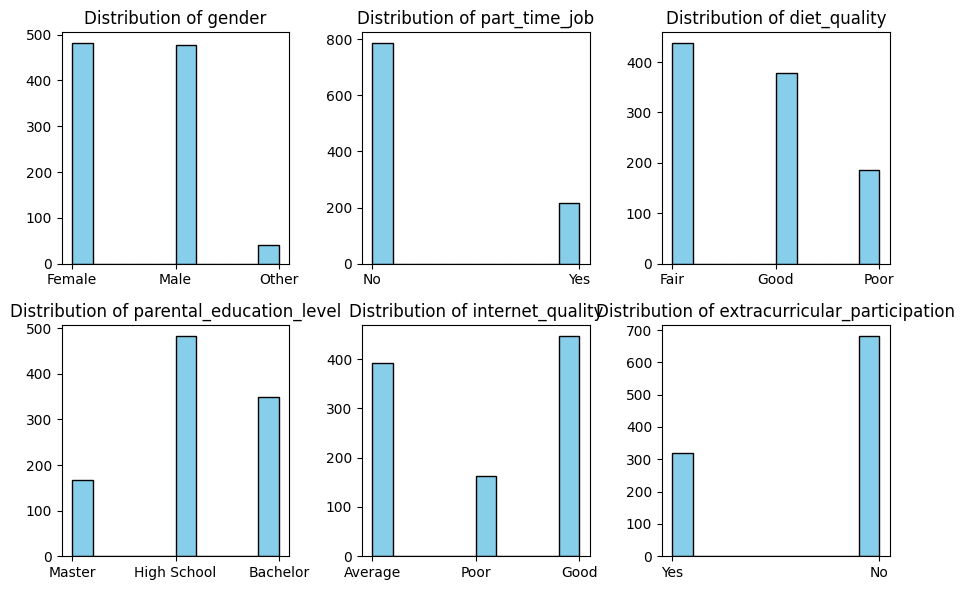

In [11]:
plt.figure(figsize=(9,6))
for i in range(6):
    plt.subplot(2, 3, i+1)  # subplot index starts at 1
    plt.hist(df[cat_col[i]], color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {cat_col[i]}')

plt.tight_layout()
plt.show()  # show all plots at once

In [12]:
num_col = df.select_dtypes(exclude='object').columns
num_col = [col for col in num_col]
num_col

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

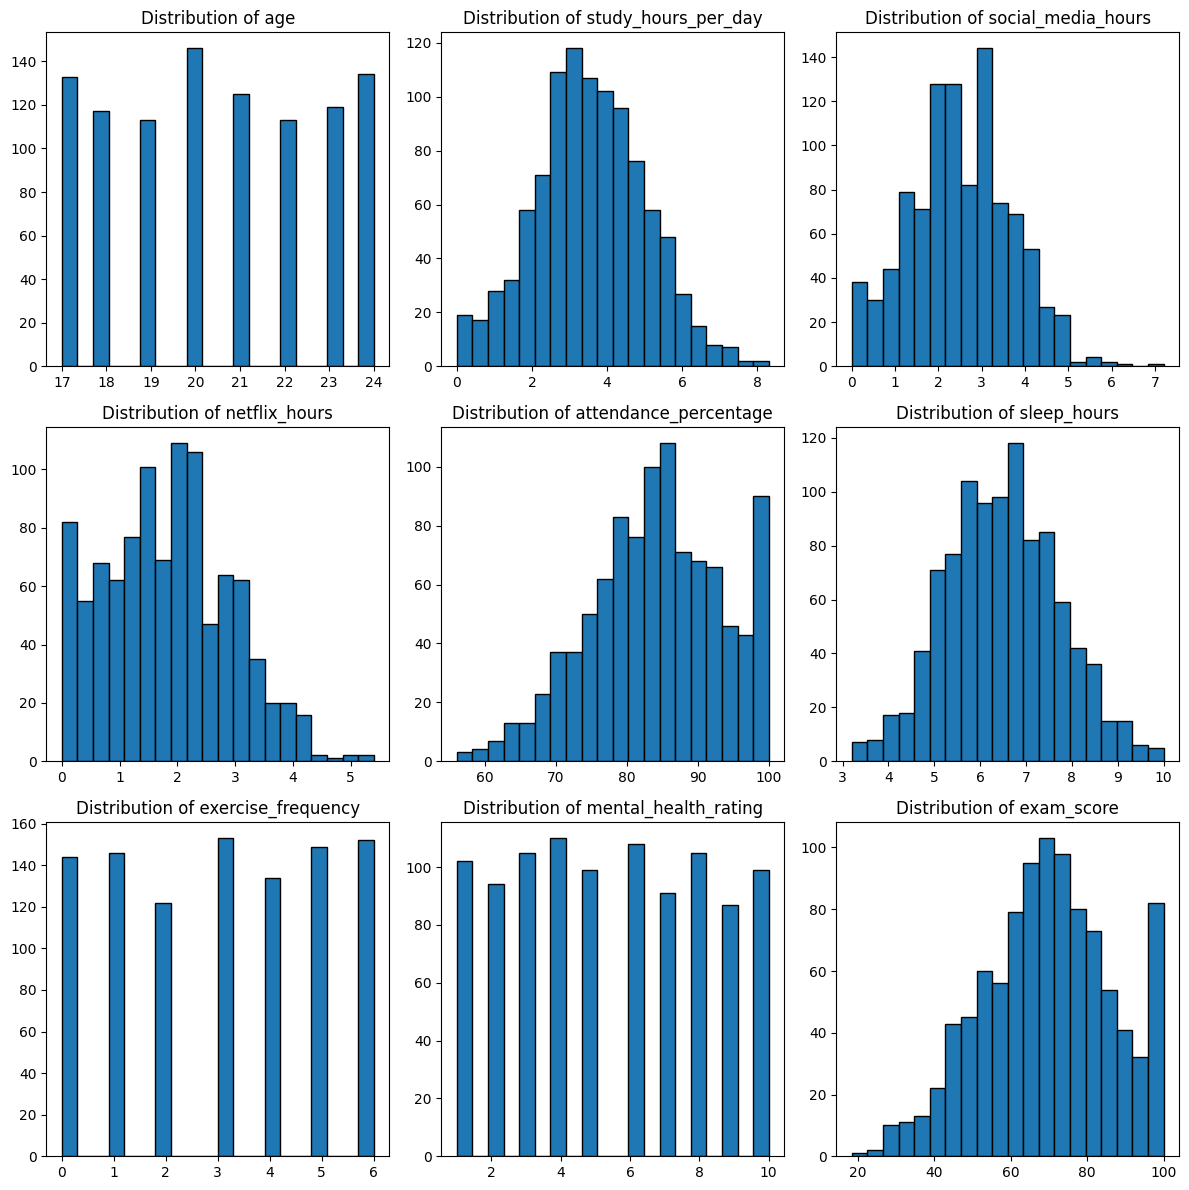

In [13]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3, 3, i+1)  # subplot index starts at 1
    plt.hist(df[num_col[i]],bins=20, edgecolor='black')
    plt.title(f'Distribution of {num_col[i]}')

plt.tight_layout()
plt.show()  # show all plots at once

In [14]:
df2 = df.drop('student_id', axis=1)
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [15]:
df[cat_col].describe()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,483,447,682


# 4. Encoding OHE + Label Encoding

In [16]:
for col in cat_col:
    print(col)

gender
part_time_job
diet_quality
parental_education_level
internet_quality
extracurricular_participation


1. Label encoding : diet_quality, parental_education, internet_quality
2. One Hot Encoding : gender, part_time_job, extracurricular_participation

In [17]:
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

In [18]:
df2['dq_e'] = df2['diet_quality'].map(diet_quality)
df2['pel_e'] = df2['parental_education_level'].map(parental_education_level)
df2['iq_e'] = df2['internet_quality'].map(internet_quality)

In [19]:
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']], drop_first=True)

In [20]:
dummies.head()

,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,False,False,False,True
1,False,False,False,False
2,True,False,False,False
3,False,False,False,True
4,False,False,False,False


In [21]:
df3 = pd.concat([df2,dummies], axis=1)

In [22]:
df3 = df3.drop(['gender',
          'part_time_job',
          'diet_quality',
          'parental_education_level',
          'internet_quality',
          'extracurricular_participation'], axis=1)

# 5. Correlation Heatmap

<Axes: >

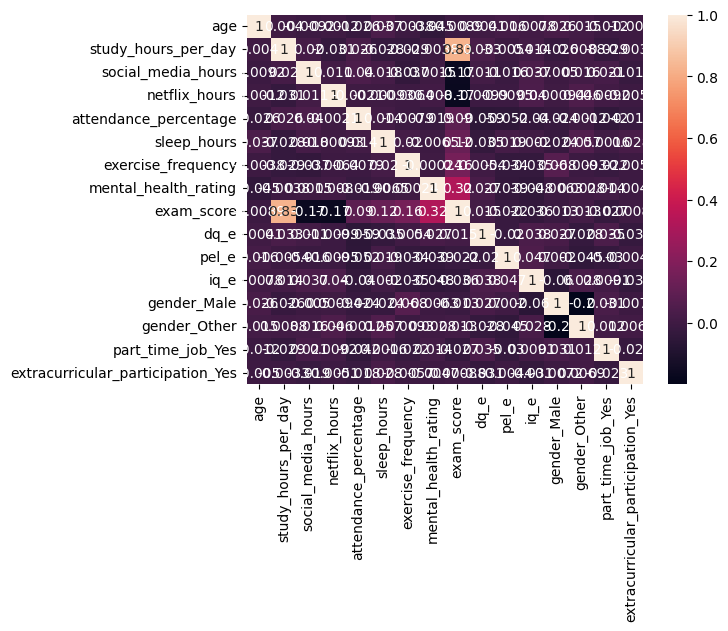

In [23]:
corr = df3.corr()
sns.heatmap(corr, annot=True)

In [24]:
df4 = df3 # .drop('study_hours_per_day', axis=1)

In [25]:
df4.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,dq_e,pel_e,iq_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,2,1,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0,1,False,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,True,False,False,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,2,False,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,2,False,False,False,False


In [26]:
X = df4.drop('exam_score', axis=1)
y = df4['exam_score']
X.shape, y.shape

((1000, 15), (1000,))

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape  # this will show the shape after scaling

(1000, 15)

# 6. Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 15), (200, 15), (800,), (200,))

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.8988342264221522

# 7. Model training and score comparison

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Try multiple models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} → R²: {r2_score(y_test, y_pred):.3f}, RMSE: {mean_squared_error(y_test, y_pred):.2f}")

Linear → R²: 0.899, RMSE: 25.94
Ridge → R²: 0.899, RMSE: 25.95
Lasso → R²: 0.898, RMSE: 26.03
Random Forest → R²: 0.810, RMSE: 48.76


Missing Values Check

In [32]:
df.isnull().sum()


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


Duplicate Data Check

In [33]:
df.duplicated().sum()


np.int64(0)